In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/weatherAus(pearth).csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,7/1/2008,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,E,0,7.0,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
1,7/2/2008,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,6,9.0,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
2,7/3/2008,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,WNW,0,4.0,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
3,7/4/2008,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,11,6.0,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
4,7/5/2008,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,13,17.0,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes


In [3]:
df = data.drop(columns=['Location','MinTemp',	'MaxTemp','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',	'Temp3pm','RainToday','RainTomorrow'])
df.head()

,Date,Rainfall
0,7/1/2008,0.0
1,7/2/2008,0.0
2,7/3/2008,0.4
3,7/4/2008,1.8
4,7/5/2008,1.8


In [4]:
!pip install fbprophet

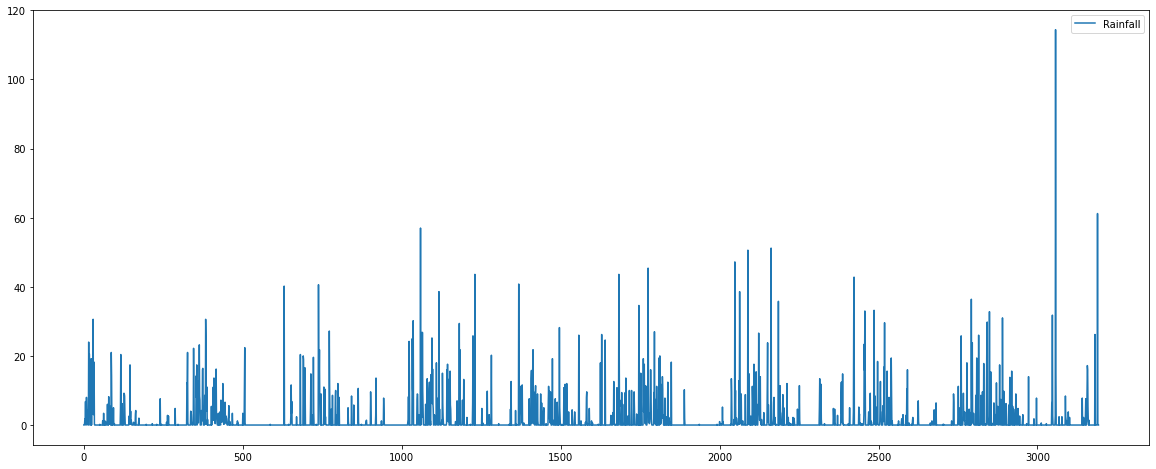

In [5]:
from matplotlib import pyplot
df[['Date','Rainfall']].plot(figsize=(20, 8))
pyplot.show()

In [6]:
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df.head()

,ds,y
0,2008-07-01,0.0
1,2008-07-02,0.0
2,2008-07-03,0.4
3,2008-07-04,1.8
4,2008-07-05,1.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3193 non-null   datetime64[ns]
 1   y       3193 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.0 KB


In [8]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_dates = model.make_future_dataframe(periods=365)
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-07-01,1.548063,-3.289273,11.148526,1.548063,1.548063,2.697548,2.697548,2.697548,-0.014156,-0.014156,-0.014156,2.711704,2.711704,2.711704,0.0,0.0,0.0,4.245611
1,2008-07-02,1.548380,-2.816838,11.806051,1.548380,1.548380,2.735574,2.735574,2.735574,0.023796,0.023796,0.023796,2.711778,2.711778,2.711778,0.0,0.0,0.0,4.283955
2,2008-07-03,1.548698,-2.714124,11.474473,1.548698,1.548698,2.843388,2.843388,2.843388,0.139221,0.139221,0.139221,2.704166,2.704166,2.704166,0.0,0.0,0.0,4.392085
3,2008-07-04,1.549015,-2.299320,11.519081,1.549015,1.549015,2.752088,2.752088,2.752088,0.062371,0.062371,0.062371,2.689717,2.689717,2.689717,0.0,0.0,0.0,4.301103
4,2008-07-05,1.549332,-2.872571,11.787139,1.549332,1.549332,2.728859,2.728859,2.728859,0.059490,0.059490,0.059490,2.669369,2.669369,2.669369,0.0,0.0,0.0,4.278192


In [10]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3553,2018-06-21,2.194254,-3.226612,11.502459,2.178793,2.208567,2.296138,2.296138,2.296138,0.139221,0.139221,0.139221,2.156916,2.156916,2.156916,0.0,0.0,0.0,4.490392
3554,2018-06-22,2.194516,-2.407252,11.399212,2.179002,2.208874,2.313211,2.313211,2.313211,0.062371,0.062371,0.062371,2.250840,2.250840,2.250840,0.0,0.0,0.0,4.507727
3555,2018-06-23,2.194777,-2.611806,11.869072,2.179181,2.209186,2.397290,2.397290,2.397290,0.059490,0.059490,0.059490,2.337801,2.337801,2.337801,0.0,0.0,0.0,4.592068
3556,2018-06-24,2.195039,-3.085295,11.786234,2.179355,2.209502,2.279538,2.279538,2.279538,-0.137319,-0.137319,-0.137319,2.416856,2.416856,2.416856,0.0,0.0,0.0,4.474577
3557,2018-06-25,2.195301,-3.311772,11.569650,2.179534,2.209811,2.353838,2.353838,2.353838,-0.133403,-0.133403,-0.133403,2.487241,2.487241,2.487241,0.0,0.0,0.0,4.549139


In [11]:
prediction.to_excel("Task_B_Output1.xlsx")

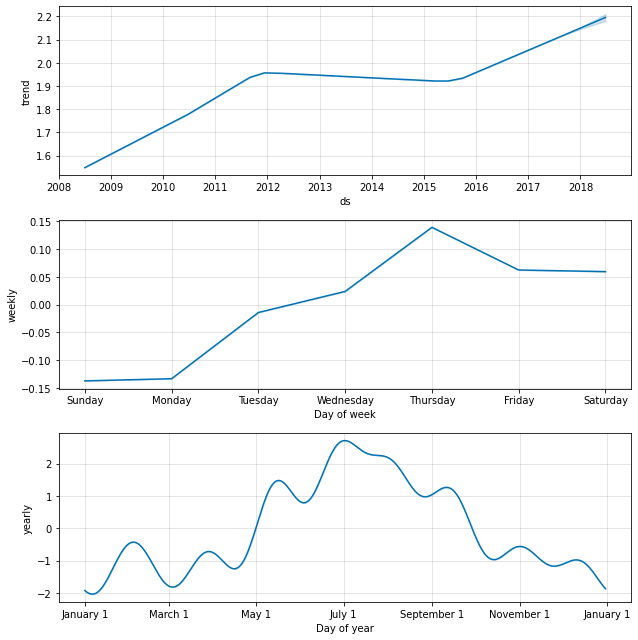

In [12]:
model.plot_components(prediction);

In [13]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 3.6 MB/s 
     |████████████████████████████████| 179 kB 12.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639389 sha256=e0e11ab4b21cec560dfe055a3f871351c15a5775f944bd1f95ad7fd43a49ade8
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


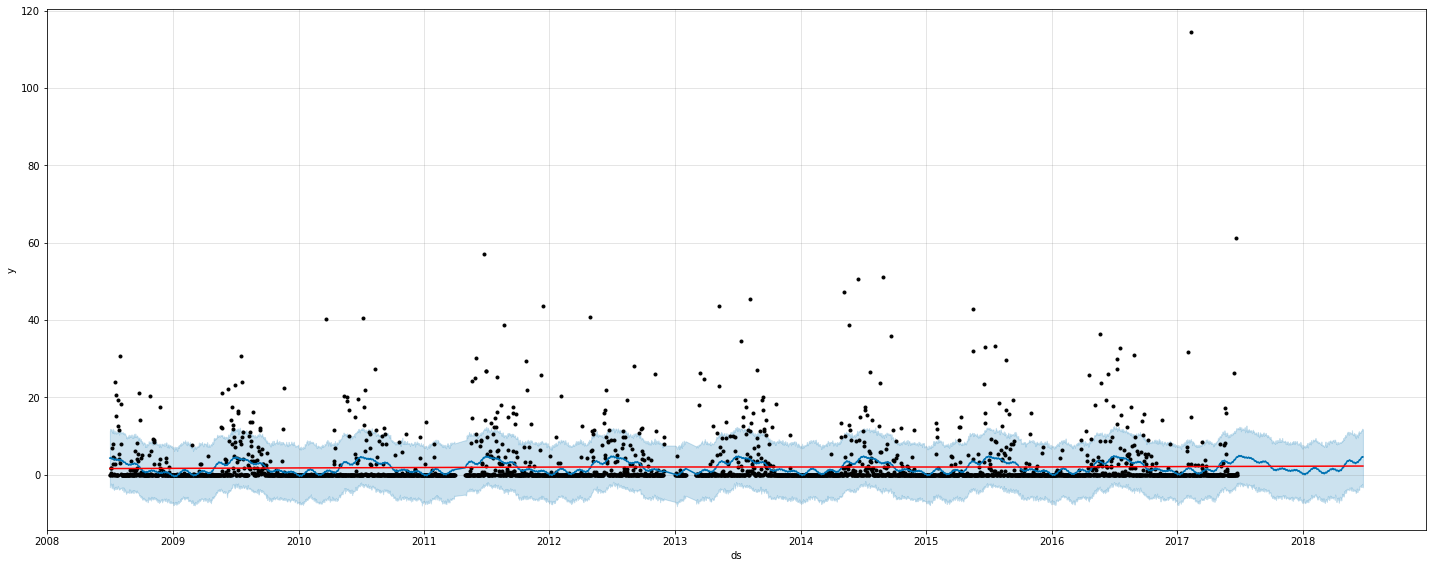

In [14]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(prediction,figsize=(20, 8));
a = add_changepoints_to_plot(fig.gca(), model, prediction)


In [16]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(model, initial='2555 days', period = '180 days', horizon = '365 days')
cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-07-01 00:00:00 and 2016-06-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-07-02,4.856912,-2.361448,11.158309,1.6,2015-07-01
1,2015-07-03,4.588342,-2.538730,10.738730,3.8,2015-07-01
2,2015-07-04,4.341873,-2.732278,10.395606,0.0,2015-07-01
3,2015-07-05,4.220006,-2.550547,10.788514,1.8,2015-07-01
4,2015-07-06,4.257237,-2.092140,10.992326,2.6,2015-07-01


In [17]:
cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1090,2017-06-21,4.148665,-2.336248,10.800693,0.2,2016-06-25
1091,2017-06-22,4.228839,-2.315141,10.953798,61.2,2016-06-25
1092,2017-06-23,4.091212,-2.658212,10.955590,0.4,2016-06-25
1093,2017-06-24,4.287219,-2.088585,10.873194,0.0,2016-06-25
1094,2017-06-25,4.018027,-2.676185,10.568081,0.0,2016-06-25


In [18]:
cv.to_excel("Task_B_CrossValidationOutput.xlsx")

In [19]:
from fbprophet.diagnostics import performance_metrics
p = performance_metrics(cv)
p.tail()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
324,361 days,29.804323,5.459334,3.196601,inf,0.929664
325,362 days,55.524493,7.451476,3.546323,inf,0.926606
326,363 days,55.601038,7.456610,3.566226,inf,0.926606
327,364 days,54.600804,7.389236,3.570581,inf,0.923547
328,365 days,53.504743,7.314694,3.553253,inf,0.926606


In [20]:
p.to_excel("Task_B_PerformanceMetricsOutput.xlsx")

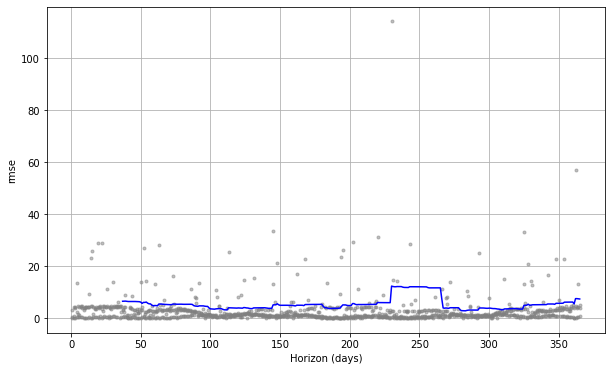

In [21]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv, metric = 'rmse')